# Project MMCS Data- Analysis

### 1) get first overview of the data available (using the data from october 2020)

In [71]:
import data_analysis.data as data

#import data frame 
october_data = data.load_data('10.csv')

#total number of trips:
print(len(october_data))

print(october_data.dtypes)
october_data.head()


19379
started_at                   datetime64[ns, UTC]
ended_at                     datetime64[ns, UTC]
duration                                   int64
start_station_id                           int64
start_station_name                        object
start_station_description                 object
start_station_latitude                   float64
start_station_longitude                  float64
end_station_id                             int64
end_station_name                          object
end_station_description                   object
end_station_latitude                     float64
end_station_longitude                    float64
dtype: object


,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-10-01 01:50:02.035000+00:00,2020-10-01 02:19:36.385000+00:00,1774,1050,EICC,Outside Edinburgh International Conference Centre,55.946071,-3.210396,1102,Haymarket Station,Haymarket Station,55.945569,-3.218185
1,2020-10-01 02:07:21.040000+00:00,2020-10-01 02:53:34.548000+00:00,2773,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750
2,2020-10-01 02:08:37.692000+00:00,2020-10-01 03:05:53.355000+00:00,3435,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750
3,2020-10-01 04:25:54.283000+00:00,2020-10-01 04:45:12.275000+00:00,1157,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589
4,2020-10-01 04:35:56.950000+00:00,2020-10-01 04:51:02.609000+00:00,905,1102,Haymarket Station,Haymarket Station,55.945569,-3.218185,262,Canonmills,near Tesco's,55.962804,-3.196284


### 2) calculate average trip length
    - How long is a bike occupied? 
    - How long until it is available again at another station
    - examine weather there are significant differences between weekday and weekend

In [2]:
import numpy as np
import datetime as dt

# average trip length
difference = october_data['ended_at'] - october_data['started_at']
print('Overall the average trip length is ', np.mean(difference).floor('T'))

# on weekends
weekend_oct = october_data[october_data['started_at'].dt.weekday > 4]
diff_weekend = weekend_oct['ended_at'] - weekend_oct['started_at']
print('On the weekends we have a trip length of ', np.mean(diff_weekend).floor('T'))

# during the week
week_oct = october_data[october_data['started_at'].dt.weekday < 5]
diff_week = week_oct['ended_at'] - week_oct['started_at']
print('And during the week we observe an aberage length of ',np.mean(diff_week).floor('T'))

Overall the average trip length is  0 days 00:26:00
On the weekends we have a trip length of  0 days 00:32:00
And during the week we observe an aberage length of  0 days 00:24:00


### 3) when does demand occur? 


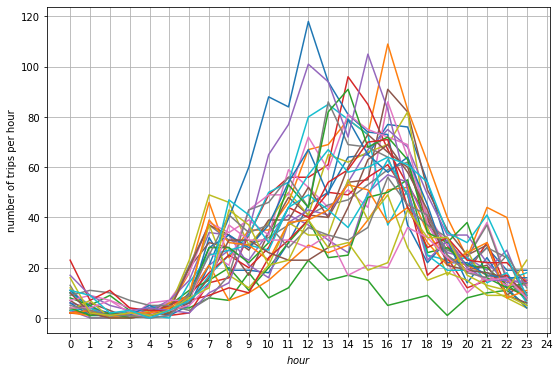

In [3]:
import matplotlib.pyplot as plt

# create a list of dataframes containing the total number of trips (over whole month) per hour over the course of a day
trip_data = october_data.set_index('started_at')
trip_data_red = trip_data.resample('H').count()['ended_at']
trip_data_red.columns = ['number_of_trips']

DFList = []
for group in trip_data_red.groupby(trip_data_red.index.day):
    DFList.append(group[1])
#print(np.shape(DFList[1]))

# set the index to hour only in order to plot is as required
for i in range(len(DFList)):
    DFList[i].index = DFList[i].index.hour
    
#print((DFList[1]))

# plot a line for each day of the month
fig, ax = plt.subplots(figsize=(9,6))

for i in range(len(DFList)):
    ax.plot(DFList[i])
ax.set_xlabel(r'$hour$')
ax.set_ylabel('number of trips per hour')
ax.set_xticks(range(25))
plt.grid()   
plt.show()







### 4) compute the average demand and arrivals per hour for each station

    --> mean can be interpreted as the parameter of an exponential random variable (create poisson process of bikes at
        station???)

In [3]:
import pandas as pd
import data_analysis.data as data
import datetime
import numpy as np
import matplotlib.pyplot as plt

october_dict = data.hourly_data_by_station(data.load_data('10.csv'))
#october_dict['Abbeyhill']

#print(np.shape(np.array(october_dict['Abbeyhill']['net_flow_value']).T) == np.shape(x))


In [40]:
oct = data.load_data('10.csv')
oct = oct.set_index('started_at', drop=False)

# split dataframe by day and store all dataframens in a list
oct_day = []
for group in oct.groupby(oct.index.day):
    oct_day.append(group[1])

    
oct_1 = data.hourly_data_by_station(oct_day[0])
oct_1

{'EICC':     hour  mean_demand_per_hour  mean_arrivals_per_hour net_flow_value
 0      1                     1                     NaN            NaN
 1      2                     0                     NaN            NaN
 2      3                     0                     NaN            NaN
 3      4                     0                     NaN            NaN
 4      5                     0                     NaN            NaN
 5      6                     1                     NaN            NaN
 6      7                     0                     NaN            NaN
 7      8                     0                     NaN            NaN
 8      9                     0                     NaN            NaN
 9     10                     0                     1.0            NaN
 10    11                     0                     1.0            NaN
 11    12                     0                     1.0            NaN
 12    13                     1                     0.0            Na

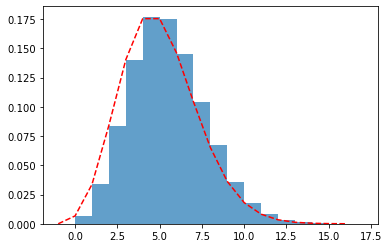

(2.0, 8.0)

In [29]:
# generate random numbers for poisson process
s = np.random.poisson(5, 100000)

# Display histogram of the sample:
plt.hist(s, density=True, bins=17, alpha=0.7)

# draw theoretical pdf
dist = poisson(5)
x = np.arange(-1,17)
plt.plot(x, dist.pmf(x), color='red', linestyle='--', label='lamda=5')

plt.show()

#calculate 80% confidence intervall
poisson.interval(0.80, 5, loc=0)

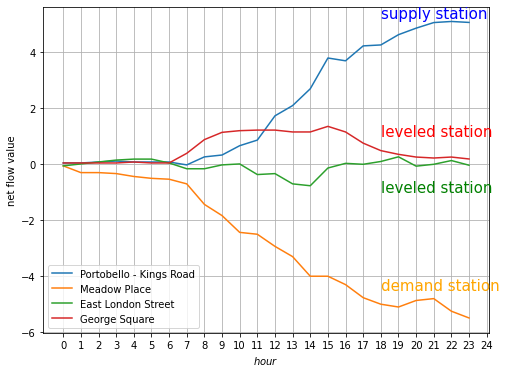

In [31]:

fig, ax = plt.subplots(figsize=(8,6))

stations_to_plot = ['Portobello - Kings Road', 'Meadow Place', 'East London Street', 'George Square']

for station in stations_to_plot:
    ax.plot(october_dict[station]['net_flow_value'], label=station)
    
ax.set_xlabel(r'$hour$')
ax.set_ylabel('net flow value')
ax.set_xticks(range(25))
ax.legend(loc='lower left')
plt.grid()   
plt.text(18, 5.2, 'supply station', fontsize=15, color='blue')
plt.text(18, -4.5, 'demand station', fontsize=15, color='orange')
plt.text(18, 1, 'leveled station', fontsize=15, color='red')
plt.text(18, -1, 'leveled station', fontsize=15, color='green')
plt.show()

    

In [49]:
import pandas as pd

# For the whole month:

# create a dataframe containing the number of arrivals at the respective stations
data_arrivals = october_data.groupby('end_station_name', as_index=False).count()[['end_station_name','started_at']]
data_arrivals.columns = ['station_name', 'number_of_arrivals']
data_arrivals

# create a dataframe containing the number of departures from the respective stations
data_departures = october_data.groupby('start_station_name', as_index=False).count()[['start_station_name','started_at']]
data_departures.columns = ['station_name', 'number_of_departures']
data_departures

# merge the two dataframes
arr_dep = pd.merge(data_arrivals, data_departures, how ='outer', on ='station_name')  
arr_dep['difference'] = ''
# add row containing the net demand (i.e the difference)
for i in range(len(arr_dep)):
    arr_dep.iloc[i, 3] = arr_dep.iloc[i, 1] - arr_dep.iloc[i, 2]

(arr_dep.sort_values(by=['difference']))

,station_name,number_of_arrivals,number_of_departures,difference
68,Meadow Place,467,632,-165
7,Bruntsfield Links,293,454,-161
5,Bristo Square,233,391,-158
13,Charlotte Square,185,313,-128
108,West Crosscauseway,208,336,-128
...,...,...,...,...
96,Stockbridge,316,199,117
62,Leith Walk,586,451,135
102,Victoria Quay,473,335,138
84,Portobello - Kings Road,583,431,152


### 5) compute number of trips per arc and try to visualize result

In [179]:
import pandas as pd
%matplotlib notebook
import networkx as nx
import matplotlib.pyplot as plt


# create dataframe that contains the number of trips per month on each arc
num_trips = october_data.groupby(['start_station_name','end_station_name']).agg({'started_at': ['count']}).reset_index()
num_trips.columns = ['start_station_name', 'end_station_name', 'number_of_trips']
num_trips.head()
num_trips_filtered = num_trips[num_trips.start_station_name != num_trips.end_station_name]
num_trips_filtered.sort_values(by=['number_of_trips'], ascending=False)

#plot the network
graph = nx.from_pandas_edgelist(num_trips_filtered.sort_values(by=['number_of_trips'], ascending=False), source = 'start_station_name', target = 'end_station_name', edge_attr = True, create_using = nx.DiGraph())
#plt.figure(figsize = (10,10))
#nx.draw_networkx(graph)
#plt.show()

#other useful functions:
# G.subgraph([nodes for subgraph])


In [180]:
# network analysis

# returns True or False whether Graph is connected 
print(nx.is_strongly_connected(graph))
print(nx.is_weakly_connected(graph))
  
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(graph)) 
  
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(graph)) 


# getting different graph attributes 
print("Total number of nodes: ", int(graph.number_of_nodes())) 
print("Total number of edges: ", int(graph.number_of_edges())) 
#print("List of all nodes: ", list(graph.nodes())) 
#print("List of all edges: ", list(graph.edges())) 

# Centralitydegree(v) = d_v/(|N|-1), where d_v is the degree of node v and N is the set of all nodes of the Graph.
# allows us to pinpoint the most important nodes of a Graph = Hubs in the transportation network
deg_centrality = nx.degree_centrality(graph) 
in_deg_centrality = nx.in_degree_centrality(graph) 
out_deg_centrality = nx.out_degree_centrality(graph) 
print(deg_centrality) 

# Page Rank: Important nodes are those with many inlinks from important nodes
# (maybe to identify stations where bikes have to be picked up)
pr = nx.pagerank(graph, alpha = 0.8) 
#print(pr) 

True
True
1
1
Total number of nodes:  111
Total number of edges:  4414
{'Meadow Place': 1.2636363636363637, 'Meadows East': 1.3454545454545455, 'Portobello - Kings Road': 1.0999999999999999, 'Duke Street': 0.9818181818181818, 'Bruntsfield Links': 1.1272727272727272, 'Tollcross': 1.2363636363636363, 'Victoria Quay': 1.1454545454545455, 'Lauriston Place': 0.9636363636363636, 'Haymarket Terrace': 0.9363636363636363, 'Picardy Place': 0.8727272727272727, 'Leith Walk': 1.309090909090909, 'Dundee Terrace': 1.1181818181818182, 'Kings Building 2': 0.8454545454545455, 'Meggetland': 0.8090909090909091, 'Boroughmuir': 1.1272727272727272, 'St Andrew Square': 1.2272727272727273, 'Pollock Halls': 0.9909090909090909, 'Stockbridge': 1.0363636363636364, 'Bristo Square': 1.1454545454545455, 'West Crosscauseway': 1.0272727272727271, 'Warrender Park Road': 0.8818181818181817, 'Abbeyhill': 1.2545454545454544, 'Dynamic Earth': 0.8545454545454545, 'Waverley Bridge': 1.3818181818181818, 'Morningside Road': 1.0

### 6) compute distance between stations

In [102]:
# compute distance between stations
import pandas as pd
import data_analysis.data as data

# get names of all existing stations
unique_stations = october_data.start_station_name.unique()

#create empty dataframe
df_loc = pd.DataFrame(columns = ['station_name', 'latitude', 'longitude'])

# extract coordinates for each station
for station in unique_stations:
    lat = (october_data[october_data['start_station_name'] == station].iloc[0,6])
    long = (october_data[october_data['start_station_name'] == station].iloc[0,7])
    new_row = {'station_name': station, 'latitude': lat, 'longitude': long}
    #append row to the dataframe
    df_loc = df_loc.append(new_row, ignore_index=True)

    
df_dist = pd.DataFrame(columns = ['station_1', 'station_2', 'distance'])
# calculate distances
for station_1 in df_loc['station_name']:
    for station_2 in df_loc['station_name']:
        lat_1 = df_loc[df_loc['station_name'] == station_1].iloc[0,1]
        long_1 = df_loc[df_loc['station_name'] == station_1].iloc[0,2]
        
        lat_2 = df_loc[df_loc['station_name'] == station_2].iloc[0,1]
        long_2 = df_loc[df_loc['station_name'] == station_2].iloc[0,2]
        
        dist = data.compute_distance(lat_1, long_1, lat_2, long_2)
        
        new_row = {'station_1': station_1, 'station_2': station_2, 'distance': dist}
        #append row to the dataframe
        df_dist = df_dist.append(new_row, ignore_index=True)

df_dist.sort_values(by=['distance']).head()


,station_1,station_2,distance
0,EICC,EICC,0.0
3472,Brunswick Place,Brunswick Place,0.0
3584,Causewayside,Causewayside,0.0
3696,Simon Square,Simon Square,0.0
3808,Dalry Road Lidl,Dalry Road Lidl,0.0


In [58]:
df_dist[df_dist['station_1']=='Abbeyhill'][df_dist[df_dist['station_1']=='Abbeyhill']['station_2']=='Holyrood Road'].iloc[0,2]

,station_1,station_2,distance
514,Abbeyhill,Holyrood Road,0.812965


### 7) Summarise close stations to one  by using k-means algorithm

In [136]:
close_stations = df_dist[df_dist['distance'] <= 0.25]
# thereshold is equivalent to about 2-3 min walk

close_stations = close_stations[close_stations.station_1 != close_stations.station_2]

df_close = pd.DataFrame(columns = ['station_name', 'latitude', 'longitude'])

# extract coordinates for each of the predetermined stations
for station in close_stations.station_1.unique():
    lat = (october_data[october_data['start_station_name'] == station].iloc[0,6])
    long = (october_data[october_data['start_station_name'] == station].iloc[0,7])
    new_row = {'station_name': station, 'latitude': lat, 'longitude': long}
    #append row to the dataframe
    df_close = df_close.append(new_row, ignore_index=True)


In [169]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = (df_close[['latitude','longitude']]) 
# 40 stations shall be somehow summarised/grouped together
data

,latitude,longitude
0,55.927985,-3.209750
1,55.953164,-3.181682
2,55.927818,-3.213308
3,55.949798,-3.187795
4,55.946643,-3.185475
5,55.939809,-3.182739
6,55.951981,-3.191890
7,55.952335,-3.207101
8,55.945834,-3.189053
9,55.962804,-3.196284


<IPython.core.display.Javascript object>


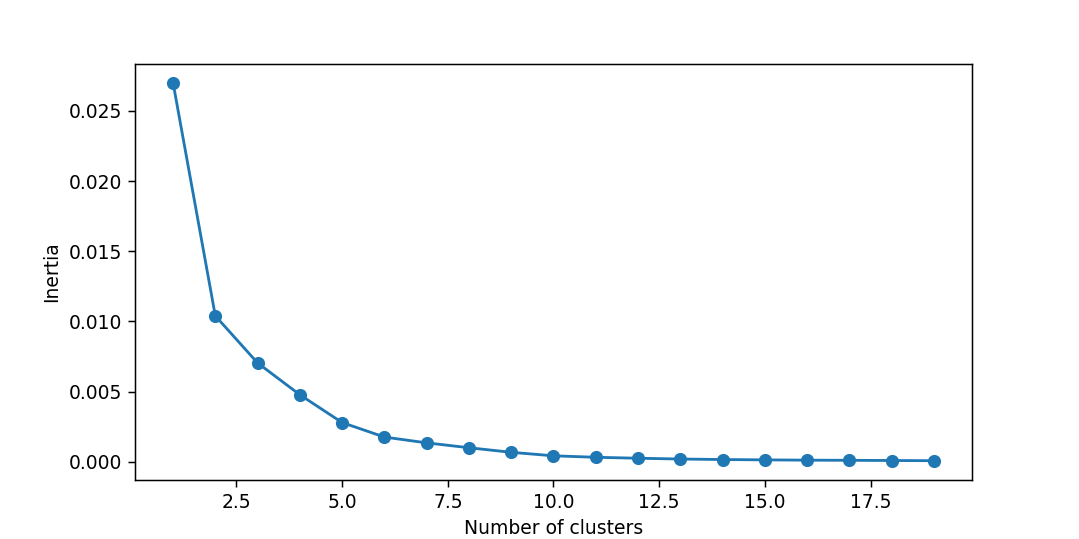

Text(0, 0.5, 'Inertia')

In [162]:
# calculate ellbow criterium to determine number of clusters 

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(8,4))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<IPython.core.display.Javascript object>


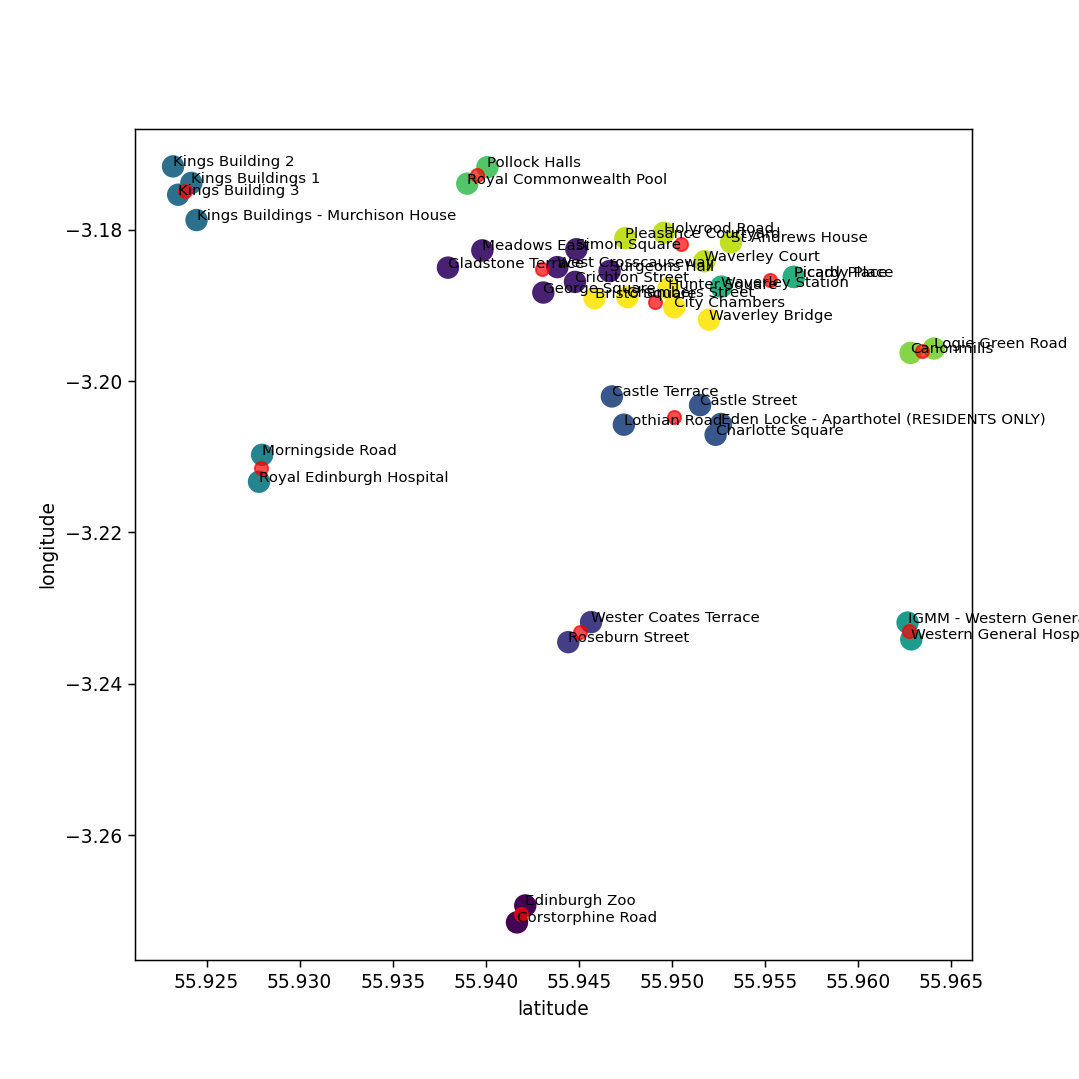

In [170]:
# choose K=12 and determine the clusters

import matplotlib.pyplot as plt

#Initialize the class object
kmeans = KMeans(n_clusters= 12)
 
#predict the labels of clusters.
pred = kmeans.fit_predict(data)
plt.figure(figsize=(8,8)) 
plt.scatter(data.latitude, data.longitude, c=pred, s=120, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.7)

for i in range(len(close_stations.station_1.unique())):    
    plt.text(df_close.latitude[i], df_close.longitude[i], str(df_close.station_name[i]), fontsize=8)
    
plt.xlabel('latitude')
plt.ylabel('longitude')


plt.show()


In [201]:
# newly compoted centers for the clusters
print(centers)

# cluster that each of the 40 enties belongs to
print((pred))

# replace the coordinates of the stations accordingly
df_close['cluster'] = pred
df_close

for i in range(len(df_close)):
    for cluster in range(12+1):
        if df_close.cluster[i] == cluster:
            df_close.latitude[i] = centers[cluster][0]
            df_close.longitude[i] = centers[cluster][1]
            
df_close

        

[[55.94189253 -3.27040525]
 [55.94299696 -3.18514186]
 [55.94503699 -3.23317243]
 [55.95012625 -3.20475328]
 [55.92383264 -3.17489829]
 [55.92790175 -3.21152875]
 [55.96274098 -3.23302574]
 [55.95523717 -3.18667405]
 [55.93954044 -3.17283521]
 [55.96343121 -3.19599197]
 [55.95048723 -3.18184656]
 [55.94906436 -3.18958319]]
[ 5 10  5 11  1  1 11  3 11  9  1  1  3 11  6  4  4  3  4  8  8 11  3  1
  2  1 10  6 10  1  0  2  7 10  9  4  0  7  7  3]


<ipython-input-201-718ad6aaabb3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.latitude[i] = centers[cluster][0]
<ipython-input-201-718ad6aaabb3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.longitude[i] = centers[cluster][1]


,station_name,latitude,longitude,cluster
0,Morningside Road,55.927902,-3.211529,5
1,St Andrews House,55.950487,-3.181847,10
2,Royal Edinburgh Hospital,55.927902,-3.211529,5
3,Hunter Square,55.949064,-3.189583,11
4,Surgeons Hall,55.942997,-3.185142,1
5,Meadows East,55.942997,-3.185142,1
6,Waverley Bridge,55.949064,-3.189583,11
7,Charlotte Square,55.950126,-3.204753,3
8,Bristo Square,55.949064,-3.189583,11
9,Canonmills,55.963431,-3.195992,9
